In [203]:
### Importare librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs



# BLOBS

In [204]:
# Generate sample data
centers = [[2, 4], [-2, -3], [0, 2]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
random_state=0)

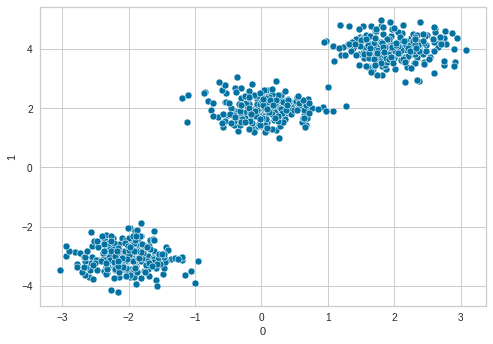

In [211]:
X = pd.DataFrame(X)
sns.scatterplot(x=X[0], y=X[1]);

## K-MEANS

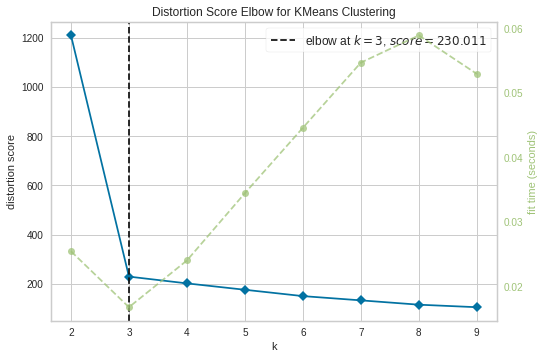

In [212]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_clusters=3)  
visualizer = KElbowVisualizer(model, k=range(2,10))
visualizer = visualizer.fit(X)
visualizer.show()


Avg Sihlouette Score:  0.7830223641795624


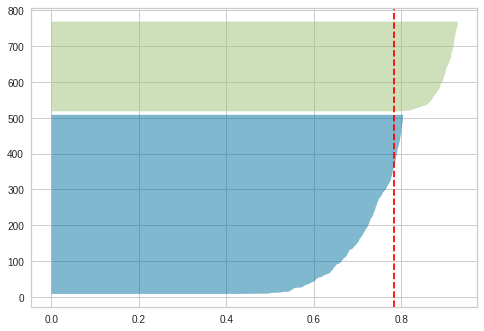


Avg Sihlouette Score:  0.7920410577235785


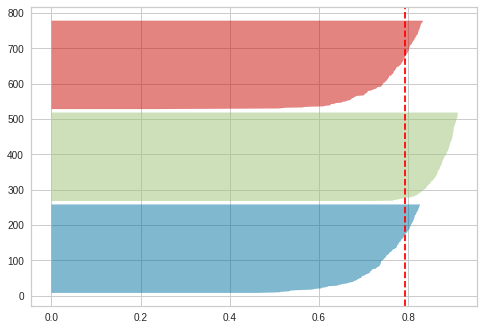


Avg Sihlouette Score:  0.6433652050520757


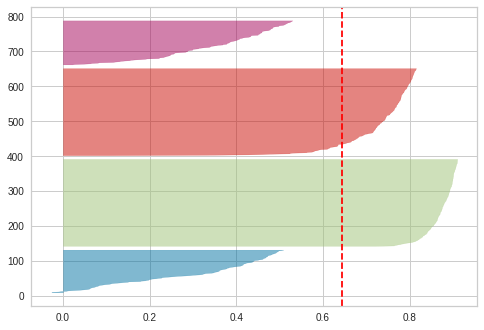


Avg Sihlouette Score:  0.45865731684663436


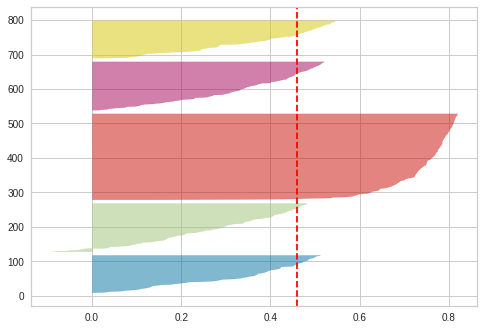


Avg Sihlouette Score:  0.3308315572609209


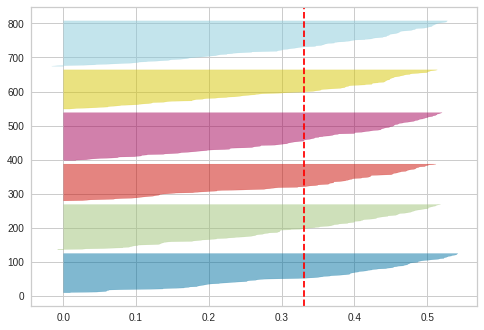

In [213]:
from yellowbrick.cluster import SilhouetteVisualizer

for n in range(2,7):

    model = KMeans(n_clusters=n)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()


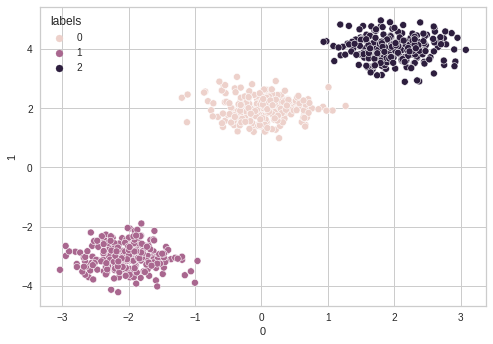

In [214]:
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

## DBSCAN

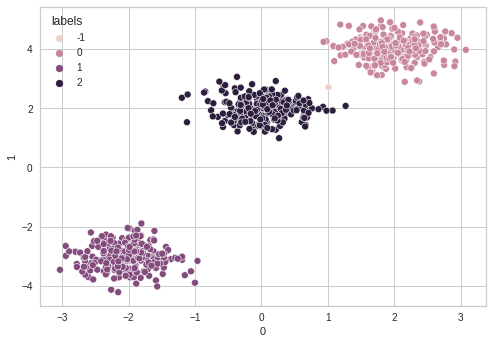

In [216]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(X)
labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

# MOONS

In [240]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1)

X = pd.DataFrame(X)

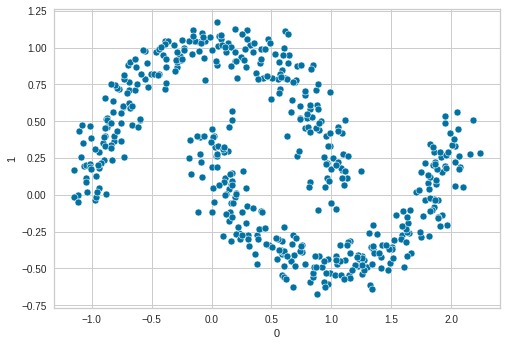

In [242]:
sns.scatterplot(x=X[0], y=X[1])

## K-MEANS

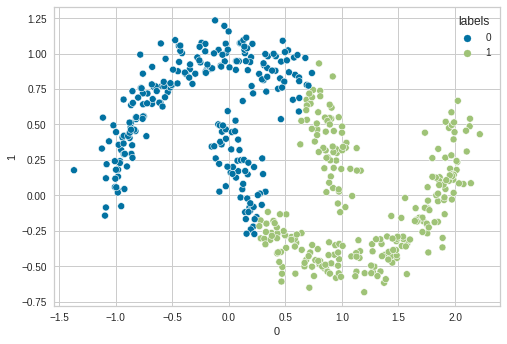

In [220]:
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

## DBSCAN

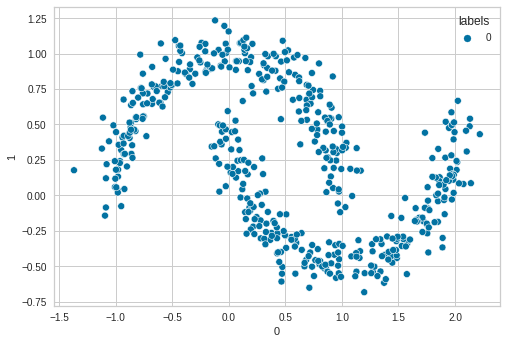

In [221]:
model = DBSCAN()
model.fit(X)
labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

### min_samples e epsilon

Ci sono 2 parametri che possono cambiare drasticamente la previsione di DBSCAN: **min_samples** (il minimo numero di samples per generare un cluster) e epsilon (la massima distanza tra due punti di uno stesso cluster)

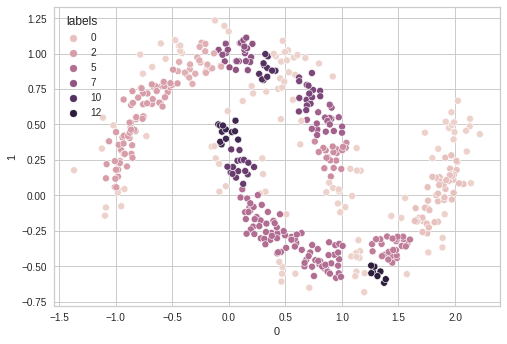

In [222]:
model = DBSCAN(eps=0.1, min_samples=8)
model.fit(X)

labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

Minimum Samples (min_samples)
There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. Here are a few rules of thumb for selecting the MinPts value:
- The larger the data set, the larger the value of MinPts should be
- If the data set is noisier, choose a larger value of MinPts
- Generally, MinPts should be greater than or equal to the dimensionality of the data set
- For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
- If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

Epsilon (ε)
After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is described in similar to the elbow method. This technique calculates the average distance between each point and its k nearest neighbors, where k = the min_samples value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In questo caso lasciamo min_samples=4. Per trovare espilon invece usiamo la tecnica appena descritta, calcolando la distanza media con NearestNeighbors.

Text(0, 0.5, 'Distance')

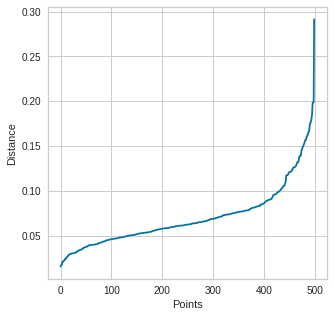

In [225]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,3], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Possiamo scegliere un epsilon intorno a 0.15, dove sembra esserci un 'elbow' appunto

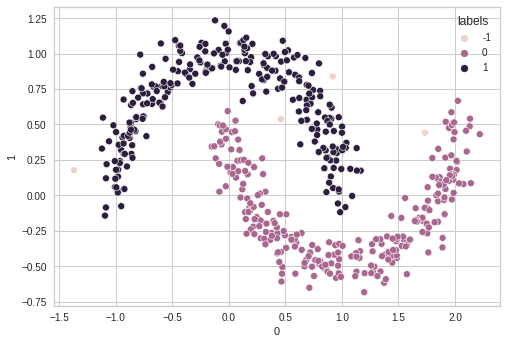

In [236]:
model = DBSCAN(eps=0.15, min_samples=4)
model.fit(X)

labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

Si noti che le label -1 sono identificate da DBSCAN come rumore

In [243]:
print('Punti identificati come rumore: ', (labels==-1).sum())

Punti identificati come rumore:  4


# CIRCLES

In [256]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=0)

X = pd.DataFrame(X)

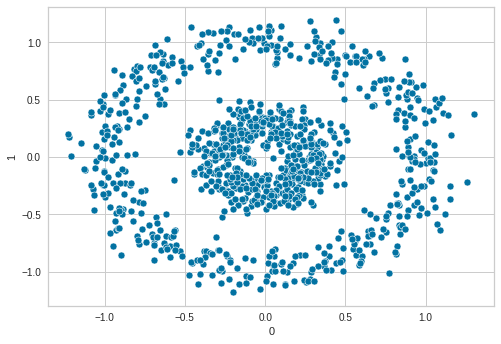

In [257]:
sns.scatterplot(x=X[0], y=X[1])

## K-MEANS

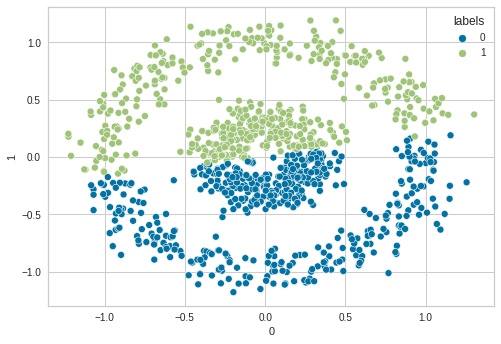

In [258]:
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

## DBSCAN

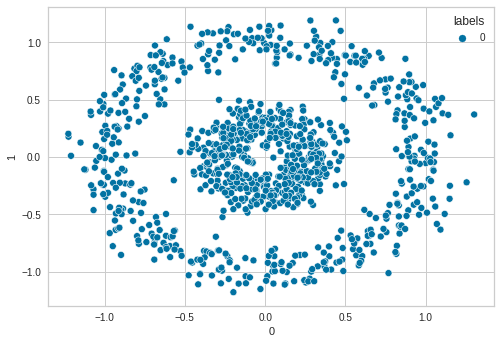

In [259]:
model = DBSCAN()
model.fit(X)
labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

### min_samples e epsilon

# DBSCAN SU DATI REALI

In [297]:
df = pd.read_csv('wine-clustering.csv')

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [299]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [301]:
X = df.copy()

In [308]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

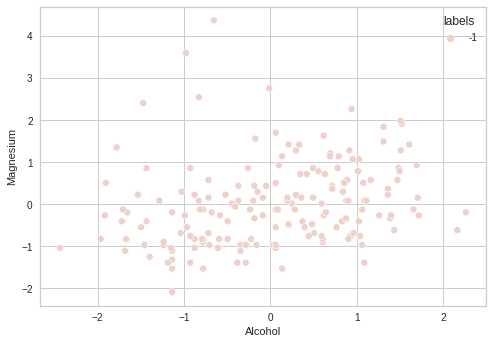

In [310]:
model = DBSCAN()
model.fit(X_scaled)
labels = model.labels_

labels = pd.Series(labels, index = X_scaled.index, name='labels')

labeled_df = X_scaled.join(labels)
sns.scatterplot(x='Alcohol', y='Magnesium', data=labeled_df, hue='labels')
plt.show()

In questo caso l'algoritmo identifica tutti i punti come rumore. Bisogna fare un tuning dei suoi iper-parametri

Text(0, 0.5, 'Distance')

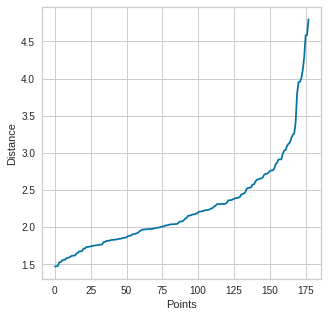

In [323]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=30)
neighbors = nearest_neighbors.fit(X_scaled)

distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:,3], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

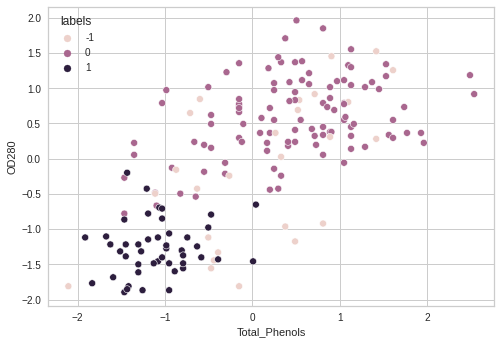

Punti identificati come rumore:  26


In [331]:
model = DBSCAN(eps=3, min_samples=30)
model.fit(X_scaled)

labels = model.labels_

labels = pd.Series(labels, index = X_scaled.index, name='labels')

labeled_df = X_scaled.join(labels)
sns.scatterplot(x='Total_Phenols', y='OD280', data=labeled_df, hue='labels')
plt.show()

print('Punti identificati come rumore: ', (labels==-1).sum())

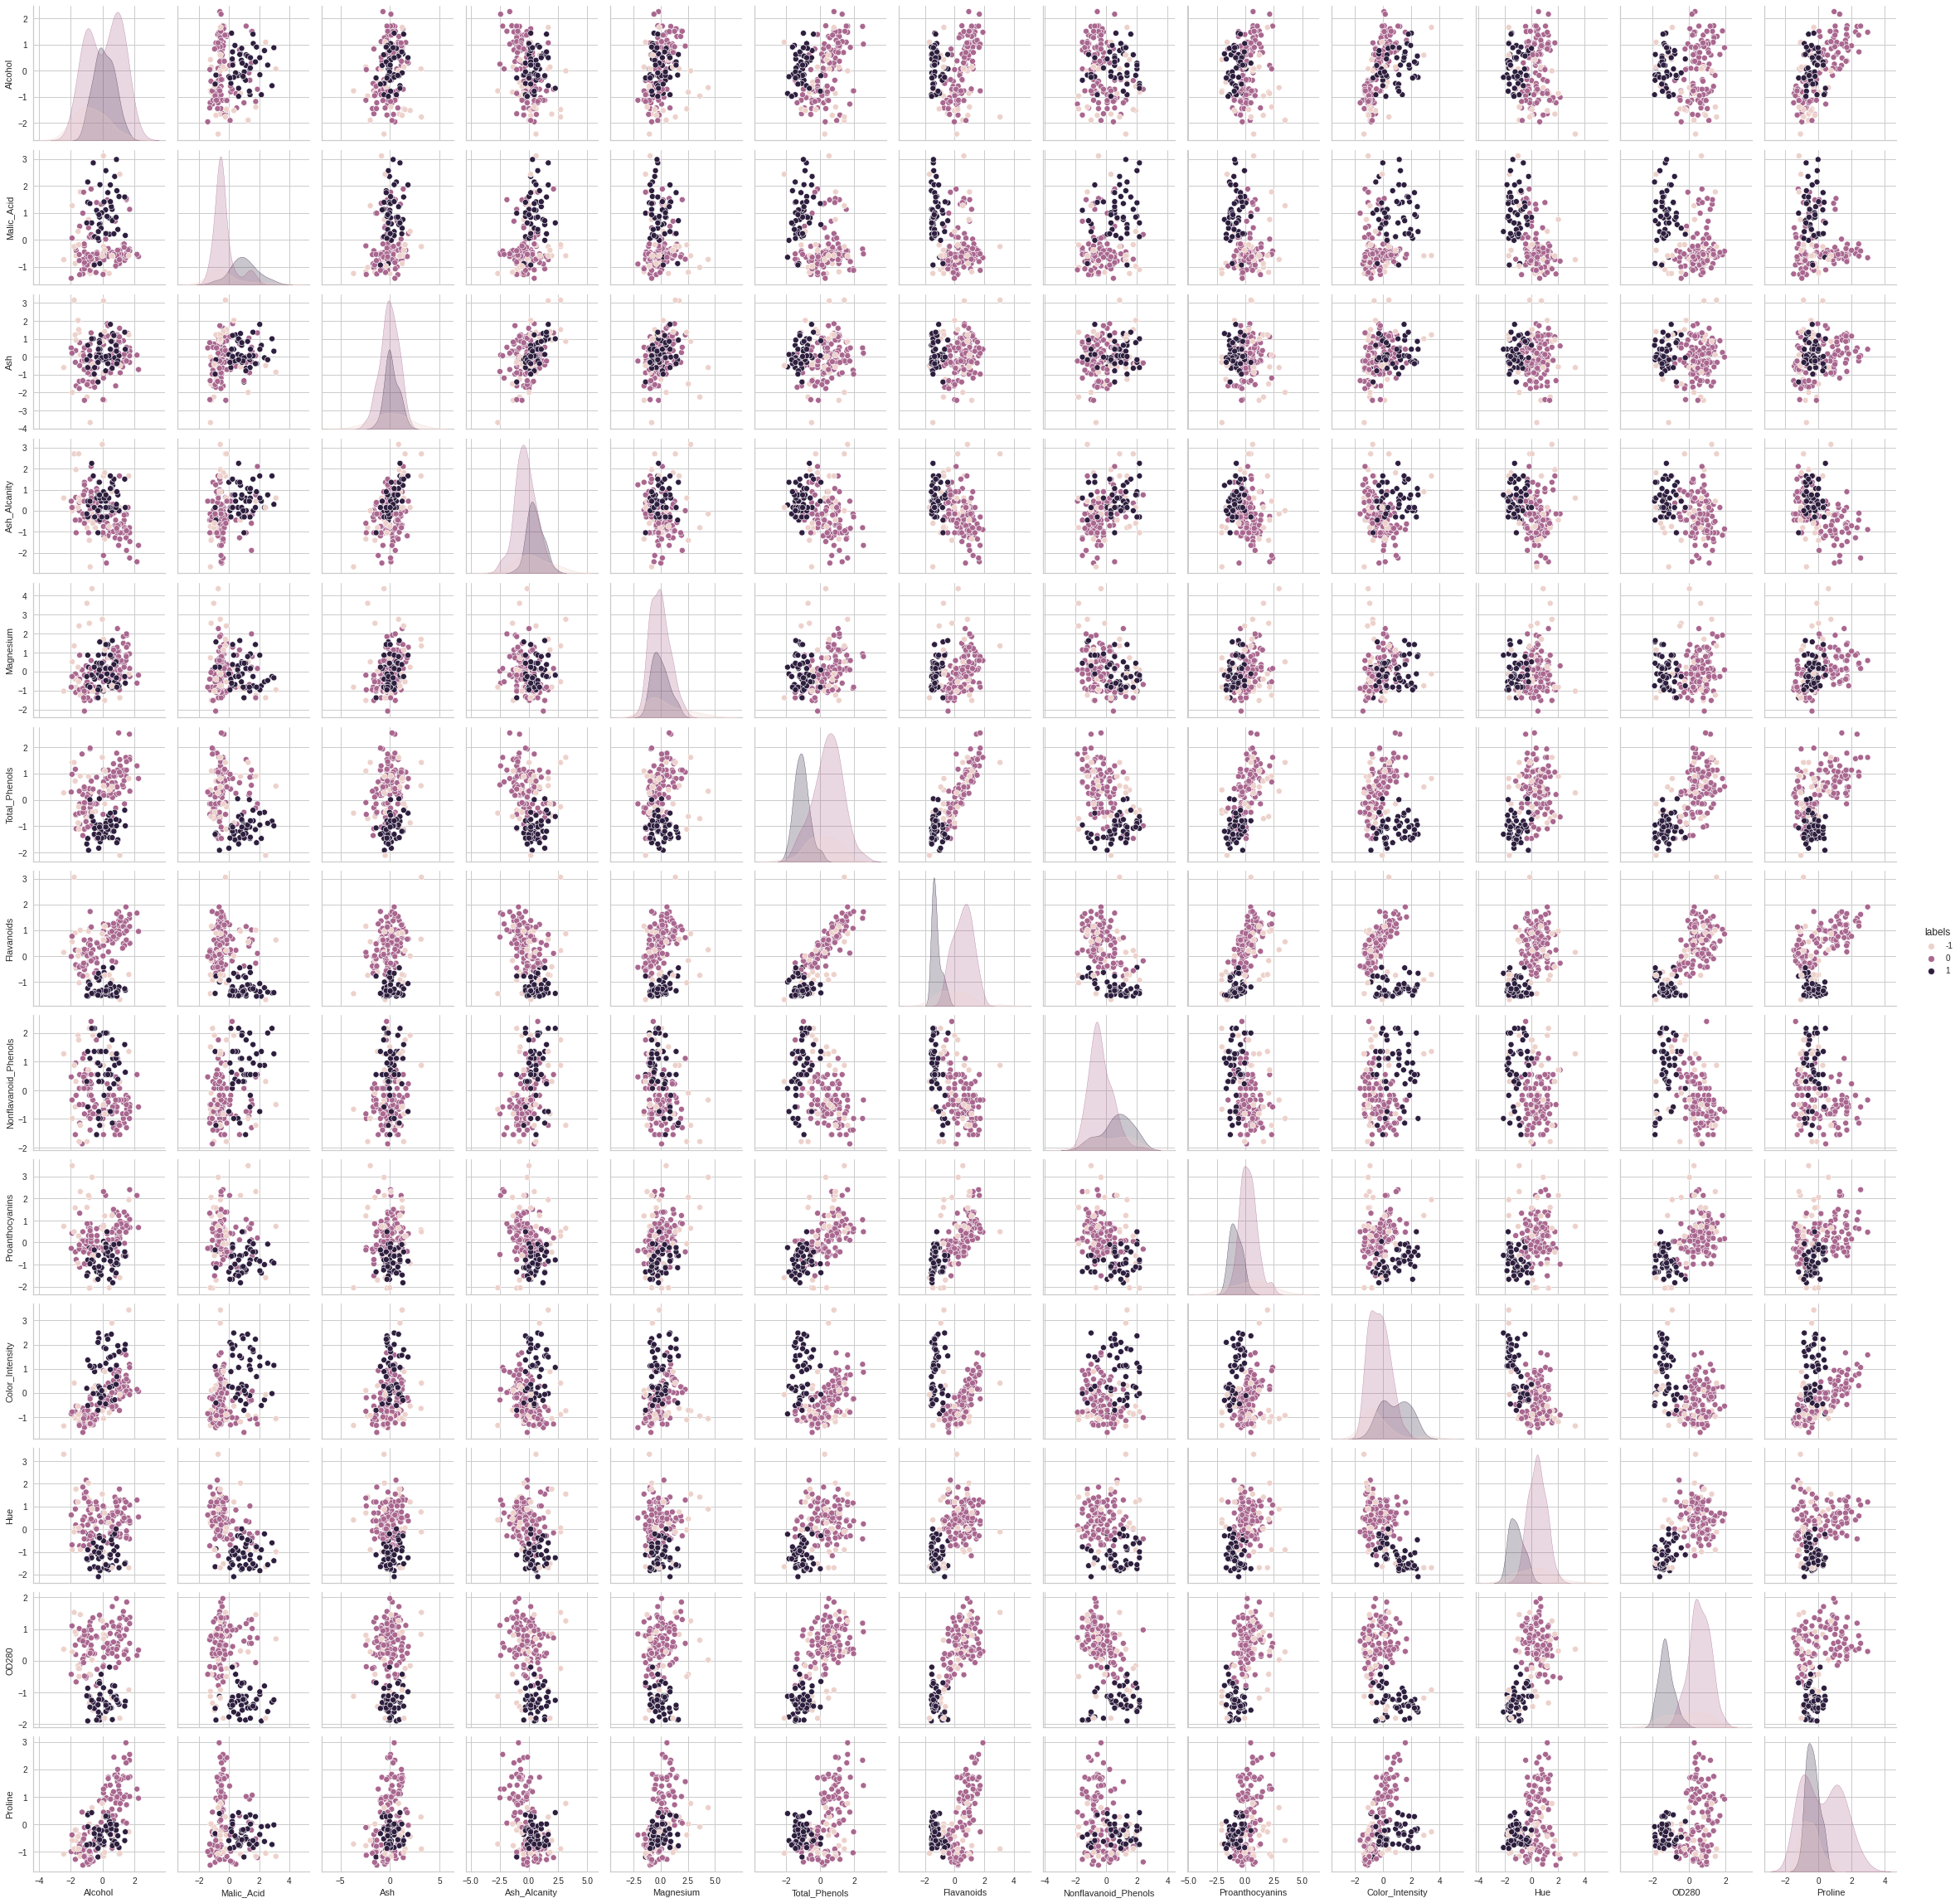

In [327]:
sns.pairplot(labeled_df, hue='labels')
plt.show()